In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from xgboost_regressor import XGBoostRegressor
from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

file_name = 'datos_preprocesados_Felipe_Agosto_2024.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 40
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)
df_filtrado = df_filtrado.drop(columns=["ID","Sex","Educ","MMSE","Cat_MMSE","Cat_Educ","Site","Country","Eurolad_code","HDI","GINI","Group","Country_cat"])
df_filtrado_sin_nulos = df_filtrado.dropna()
X = df_filtrado_sin_nulos.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado_sin_nulos["Age"]

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)
Plotter = Plotter()

In [5]:
with open(f'{path}Opt_Model/opt_XGB_model_40A_1_electrode.pickle', 'rb') as file:
    opt_xgb_1_electrode= pickle.load(file)

In [6]:
errores = opt_xgb_1_electrode.cv_results_['mean_test_score'][:100]


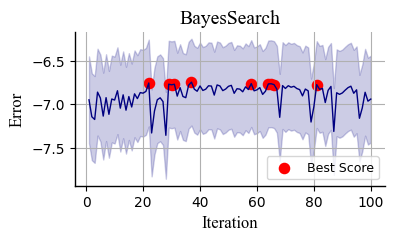

Top 1: Iteration 37, Score -6.745577799303374
Top 2: Iteration 22, Score -6.755630043428248
Top 3: Iteration 58, Score -6.76242828785834
Top 4: Iteration 65, Score -6.764103819929632
Top 5: Iteration 64, Score -6.766378288933147
Top 6: Iteration 29, Score -6.7692255582677605
Top 7: Iteration 31, Score -6.770040335413498
Top 8: Iteration 81, Score -6.773995284038023
Top 9: Iteration 66, Score -6.774111743737537
Top 10: Iteration 30, Score -6.776151581123067


In [7]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [8]:
best_params_xgb = xgb_model.best_hyper(opt_xgb_1_electrode, num_max=100)

In [9]:
best_params_xgb

[{'colsample_bytree': 0.8519011969918635,
  'learning_rate': 0.01423398632529757,
  'max_depth': 4,
  'n_estimators': 439,
  'subsample': 0.7350674758023661},
 {'colsample_bytree': 0.8787796415602391,
  'learning_rate': 0.012185563890568603,
  'max_depth': 4,
  'n_estimators': 445,
  'subsample': 0.7196365685784316},
 {'colsample_bytree': 0.9708805163042077,
  'learning_rate': 0.030374633851843042,
  'max_depth': 8,
  'n_estimators': 3098,
  'subsample': 0.6},
 {'colsample_bytree': 0.9885781096366899,
  'learning_rate': 0.01,
  'max_depth': 6,
  'n_estimators': 360,
  'subsample': 0.6015263558742571},
 {'colsample_bytree': 0.8268310429935797,
  'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 326,
  'subsample': 0.6},
 {'colsample_bytree': 0.7461552508550054,
  'learning_rate': 0.017926524442729155,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.6758866302013601},
 {'colsample_bytree': 0.6189277873176051,
  'learning_rate': 0.016695326473264053,
  'max_depth': 10

In [10]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(params_=best_params_xgb[0])

In [11]:
with open(f'{path}Opt_Model_2/BestModel_XGB_all_features_1electrode_40A.pickle', 'wb') as file:
    pickle.dump(best_model, file)
with open(f'{path}Opt_Model_2/results_XGB_model_all_features_1electrode_40A.pickle', 'wb') as file:
    pickle.dump(results, file)
with open(f'{path}Opt_Model_2/residual_model_XGB_model_all_features_1electrode_40A.pickle', 'wb') as file:
    pickle.dump(residual_model, file)

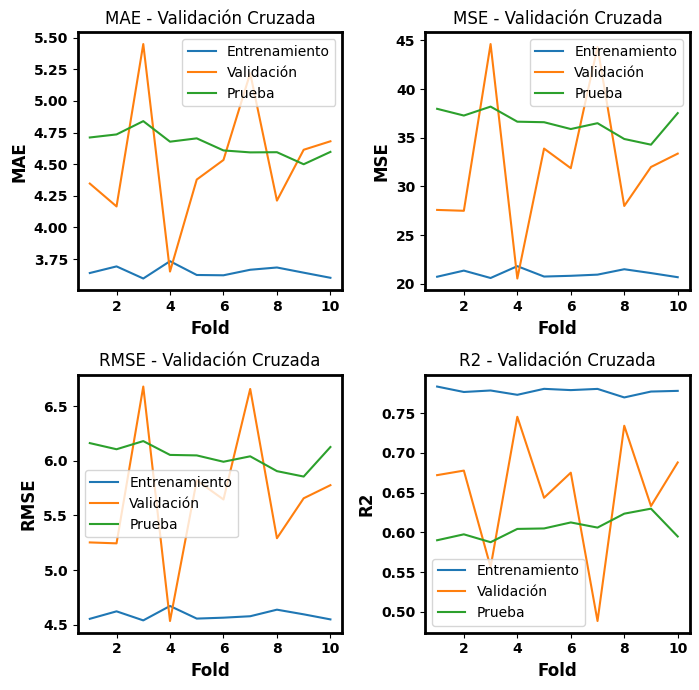

In [12]:
Plotter.plot_metricas_evaluacion(results)

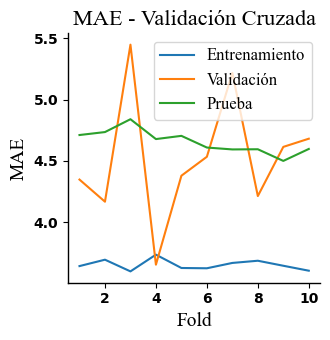

In [13]:
Plotter.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [14]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     236.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           5.94e-33
Time:                        15:19:37   Log-Likelihood:                -466.14
No. Observations:                 156   AIC:                             936.3
Df Residuals:                     154   BIC:                             942.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6375      2.590      9.511      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


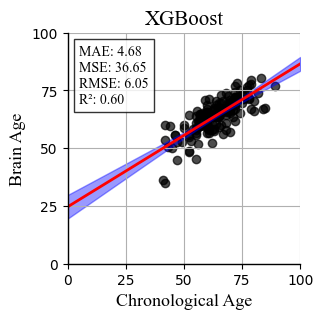

Error medio absoluto: 4.6777049232909365
Error cuadrático medio: 36.65153863148433
Raíz del error cuadrático medio: 6.054051422930295
Coeficiente de determinación (R²): 0.6043341880333322


In [15]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [16]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
Theta_canon_RPD: 169.81053161621094
PE: 169.3346710205078
Beta_subj_spec_RPD: 102.34193420410156
Low_subj_spec_RPD: 81.06897735595703
Beta2_canon_RPD: 75.61053466796875
FD: 74.37113952636719
Beta3_canon_RPD: 74.20465087890625
Gamma_canon_RPD: 70.81092071533203
SSV: 70.26183319091797
IAF: 68.36003112792969
Offset: 67.21945190429688
Delta_subj_spec_RPD: 65.1856460571289
Beta1_canon_RPD: 62.31060028076172
Theta_subj_spec_RPD: 60.97677993774414
Delta_canon_RPD: 48.62834930419922
Theta_canon_EPP: 47.54982376098633
Knee: 45.39404296875
High_subj_spec_RPD: 39.58720779418945
Gamma_subj_spec_RPD: 38.95763397216797
WMEAN: 26.489295959472656
Alpha2_canon_RPD: 25.341087341308594
Low_subj_spec_EPP: 24.0345401763916
Slope: 22.264686584472656
Beta_subj_spec_EPP: 20.900423049926758
Beta3_canon_EPP: 17.375804901123047
Theta_subj_spec_EPP: 14.106941223144531
Alpha1_canon_RPD: 13.84480094909668
Gamma_canon_EPP: 12.034710884094238
Delta_subj_s

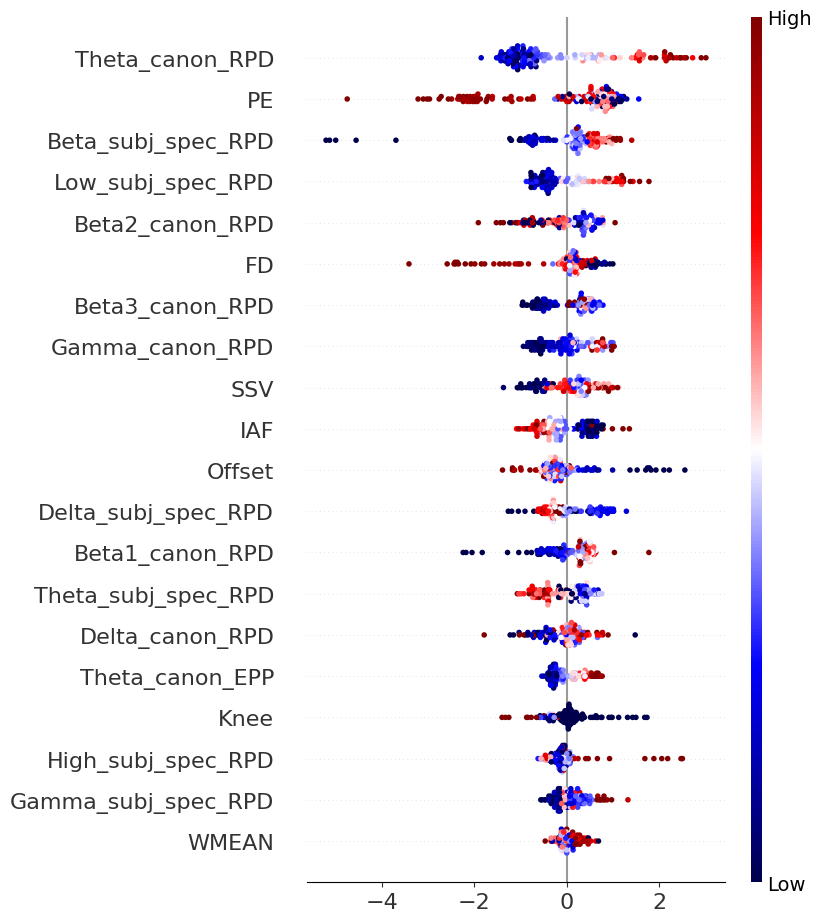

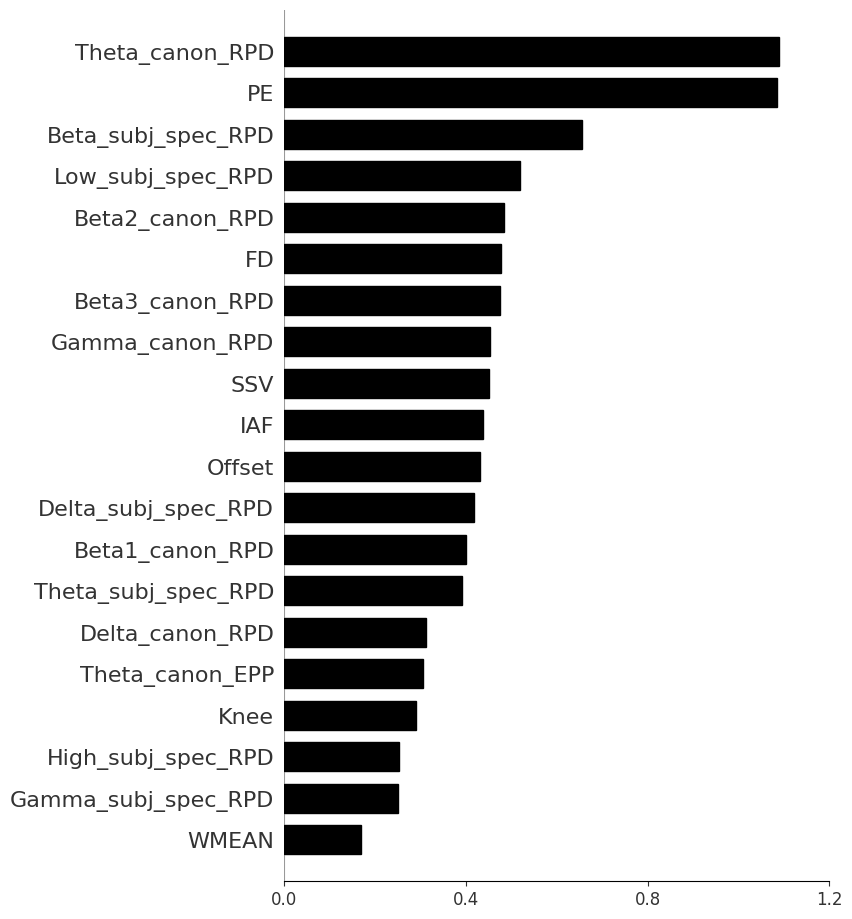

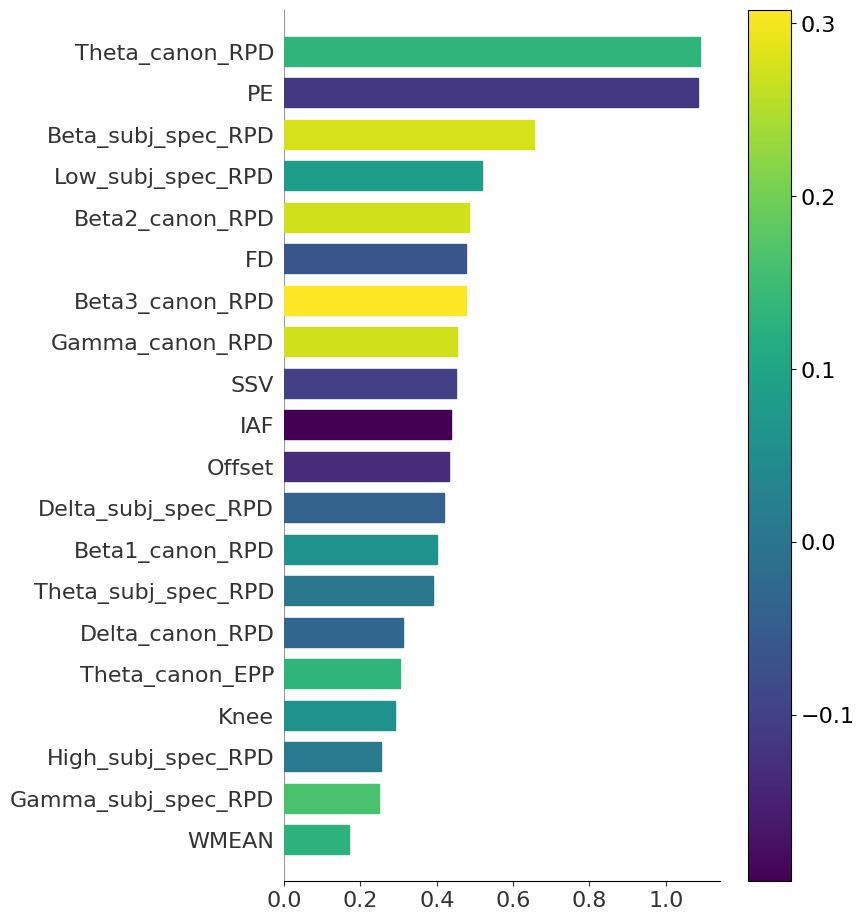

In [17]:
Plotter.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test)